In [1]:
import pandas as pd
from pycaret.classification import *
import matplotlib.pyplot as plt 
import seaborn as sns 

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
data = pd.read_csv('archive/treino.csv')
test = pd.read_csv('archive/teste.csv')

In [3]:
data.head()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
(data.isna().sum() / data.shape[0]).sort_values(ascending=False) * 100

salario_mensal                           19.784545
numero_de_dependentes                     2.616364
inadimplente                              0.000000
util_linhas_inseguras                     0.000000
idade                                     0.000000
vezes_passou_de_30_59_dias                0.000000
razao_debito                              0.000000
numero_linhas_crdto_aberto                0.000000
numero_vezes_passou_90_dias               0.000000
numero_emprestimos_imobiliarios           0.000000
numero_de_vezes_que_passou_60_89_dias     0.000000
dtype: float64

In [3]:
data = data.dropna(axis=0)
data = data.drop_duplicates()

In [6]:
data.shape

(88177, 11)

In [4]:
X = data.drop('inadimplente', axis=1)
y = data.iloc[:, 0:1]

In [5]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [6]:
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [24]:
data_resampled.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0


In [7]:
setup = setup(data=data_resampled, target='inadimplente', train_size=0.5, 
              imputation_type='iterative',
              remove_outliers=True, session_id=42, use_gpu=True, 
              fix_imbalance=False,
              outliers_threshold=0.15,
              numeric_features=['vezes_passou_de_30_59_dias', 'numero_vezes_passou_90_dias', 'numero_de_vezes_que_passou_60_89_dias'])

,Description,Value
0,session_id,42
1,Target,inadimplente
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(164190, 11)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


# Compare Models

In [12]:

best_models = compare_models(fold=5)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8945,0.9618,0.8884,0.9056,0.8969,0.7889,0.7891,3.9220
et,Extra Trees Classifier,0.8940,0.9620,0.9063,0.8905,0.8983,0.7877,0.7878,4.8120
xgboost,Extreme Gradient Boosting,0.8821,0.9561,0.8612,0.9059,0.8829,0.7643,0.7653,1.3120
lightgbm,Light Gradient Boosting Machine,0.8746,0.9519,0.8483,0.9031,0.8748,0.7495,0.7510,0.4320
catboost,CatBoost Classifier,0.8731,0.9506,0.8450,0.9031,0.8731,0.7465,0.7482,4.3600
gbc,Gradient Boosting Classifier,0.8666,0.9443,0.8355,0.8991,0.8661,0.7335,0.7355,7.3260
ada,Ada Boost Classifier,0.8522,0.9363,0.8493,0.8626,0.8558,0.7042,0.7044,1.9380
dt,Decision Tree Classifier,0.8516,0.8510,0.8679,0.8483,0.8580,0.7026,0.7028,0.3340
knn,K Neighbors Classifier,0.7880,0.8693,0.8983,0.7443,0.8141,0.5726,0.5864,1.1460
lr,Logistic Regression,0.7410,0.8152,0.7260,0.7614,0.7432,0.4822,0.4829,1.5400


# Create Model

In [8]:
model = create_model('lightgbm', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8795,0.9557,0.8592,0.9026,0.8804,0.7591,0.7600
1,0.8737,0.9516,0.8494,0.9002,0.8741,0.7476,0.7488
2,0.8707,0.9515,0.8381,0.9044,0.8700,0.7418,0.7440
3,0.8743,0.9526,0.8485,0.9021,0.8745,0.7489,0.7503
4,0.8759,0.9527,0.8484,0.9052,0.8759,0.7521,0.7536
Mean,0.8748,0.9528,0.8487,0.9029,0.8750,0.7499,0.7513
SD,0.0029,0.0015,0.0067,0.0017,0.0033,0.0057,0.0053


# Tuning Model

In [9]:
tuned_lgbm = tune_model(model, n_iter=5, search_library='scikit-optimize', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8959,0.9661,0.8831,0.9124,0.8975,0.7918,0.7922
1,0.8919,0.9629,0.8769,0.9103,0.8933,0.7838,0.7844
2,0.8935,0.9639,0.8723,0.9172,0.8942,0.7870,0.7880
3,0.8927,0.9637,0.8774,0.9113,0.8940,0.7854,0.7859
4,0.8947,0.9640,0.8781,0.9145,0.8959,0.7895,0.7902
Mean,0.8937,0.9641,0.8775,0.9132,0.8950,0.7875,0.7882
SD,0.0014,0.0011,0.0035,0.0025,0.0015,0.0029,0.0028


# Metrics

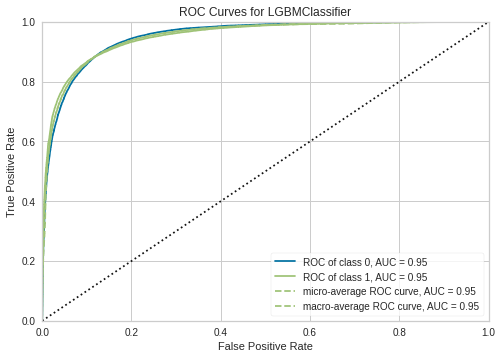

In [17]:
plot_model(tuned_lgbm, plot='auc')

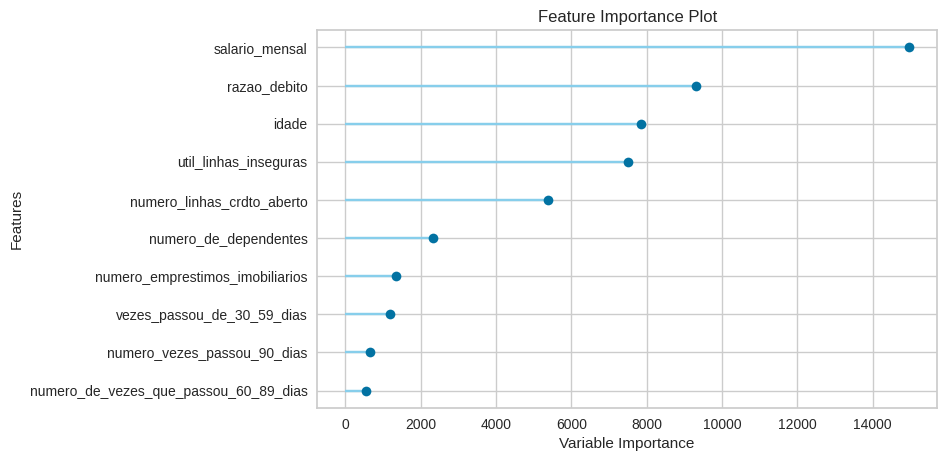

In [18]:
plot_model(tuned_lgbm, plot='feature')

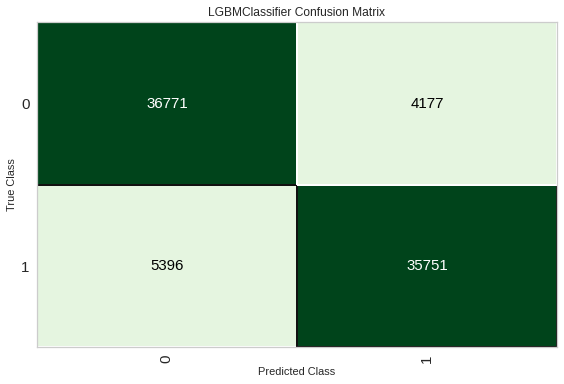

In [19]:
plot_model(tuned_lgbm, plot='confusion_matrix')

In [20]:
predict_model(tuned_lgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8834,0.9523,0.8689,0.8954,0.8819,0.7668,0.7671


# Finalize Model

In [10]:
final_model = finalize_model(tuned_lgbm)

[LightGBM] [Warning] bagging_fraction is set=0.887437593014418, subsample=1.0 will be ignored. Current value: bagging_fraction=0.887437593014418
[LightGBM] [Warning] feature_fraction is set=0.7588282465072769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7588282465072769
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.887437593014418, subsample=1.0 will be ignored. Current value: bagging_fraction=0.887437593014418
[LightGBM] [Warning] feature_fraction is set=0.7588282465072769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7588282465072769
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.887437593014418, subsample=1.0 will be ignored. Current value: bagging_fraction=0.887437593014418
[LightGBM] [Warning] feature_fraction is 

In [23]:
predict_model(final_model, data=test)

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,Label,Score
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0,0,0.9923
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0,0,0.5362
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0,0,0.9850
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0,0,0.5529
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0,0,0.7113
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.000000,68,1,0.062858,10833.0,9,1,0,0,0.0,0,0.8560
39996,0.061117,84,0,0.013598,8456.0,7,0,0,0,0.0,0,0.9507
39997,0.817745,70,0,0.663056,6000.0,17,0,2,0,0.0,0,0.7131
39998,0.106139,64,2,0.865438,5045.0,12,0,4,0,0.0,0,0.6025


In [11]:
save_model(final_model, model_name='best_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['vezes_passou_de_30_59_dias',
                                                           'numero_vezes_passou_90_dias',
                                                           'numero_de_vezes_que_passou_60_89_dias'],
                                       target='inadimplente',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imput...
                                 importance_type='split',
                                 learning_rate=0.037577891518562063,
                                 max_depth=-1, min_child_samples=53,
                     